In [1]:
%matplotlib inline
import nengo.spa as spa
import numpy as np
import matplotlib.pyplot as plt

First, here's the SPA power function:

In [2]:
def power(s, e):
    x = np.fft.ifft(np.fft.fft(s.v) ** e).real
    return spa.SemanticPointer(data=x)


Here are two helper functions for computing the dot product over space, and for plotting the results

In [7]:


def spatial_dot(v, Xs, Ys, scales, xs, ys, transform=1):
    identity = spa.SemanticPointer(data=np.eye(D)[0])
    vs = np.zeros((len(ys),len(xs)))
    for i,x in enumerate(xs):
        for j, y in enumerate(ys):
            
            t = identity
            for k,s in enumerate(scales):
                t = t*power(Xs[k], x*s)*power(Ys[k], y*s)
                
            t = t*transform
            vs[j,i] = np.dot(v.v, t.v)
    return vs

def spatial_plot(vs, vmax=1, vmin=-1, colorbar=True):
    vs = vs[::-1, :]
    plt.imshow(vs, interpolation='none', extent=(xs[0],xs[-1],ys[0],ys[-1]), vmax=vmax, vmin=vmin, cmap='plasma')
    if colorbar:
        plt.colorbar()
        

[1.         1.61803399 2.61803399 4.23606798 6.85410197]


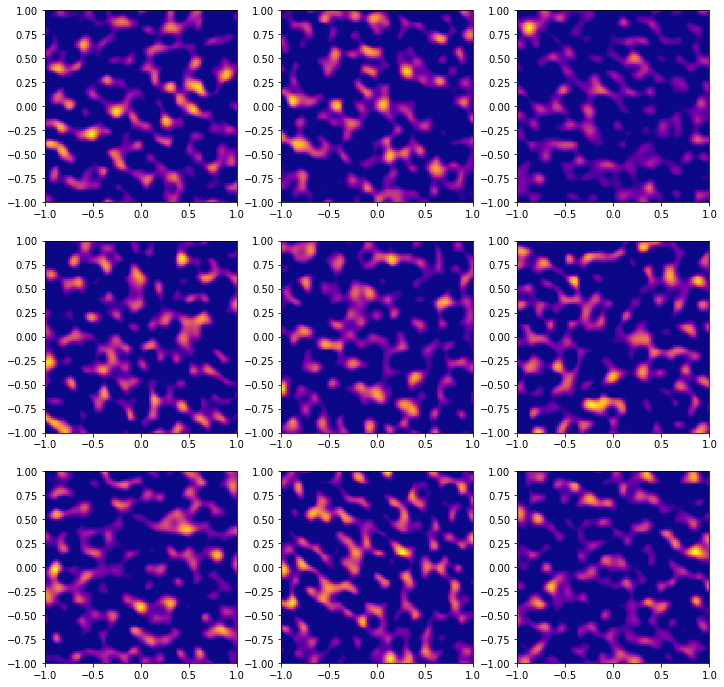

In [17]:
D = 256
phi = (1+np.sqrt(5))/2
scales = phi**(np.arange(5))
print(scales)
Xs = []
Ys = []
for i in range(len(scales)):
    X = spa.SemanticPointer(D)
    X.make_unitary()
    Y = spa.SemanticPointer(D)
    Y.make_unitary()
    Xs.append(X)
    Ys.append(Y)

W = 1
Q = 100
xs = np.linspace(-W, W, Q)
ys = np.linspace(-W, W, Q)


def relu(x):
    return np.maximum(x, 0)

M = 3
plt.figure(figsize=(12,12))
for i in range(M):
    for j in range(M):
        plt.subplot(M, M, i*M+j+1)
        spatial_plot(relu(spatial_dot(spa.SemanticPointer(D), Xs, Ys, scales, xs, ys)), vmin=None, vmax=None, colorbar=False)